In [1]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_new.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_new.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  moving_x  moving_y  \
0             0.0    Kento MOMOTA     1.0  發短球  ...  0.012041  0.262869   
1             0.0  CHOU Tien Chen     3.0   長球  ... -0.073337  0.594564   
2             0.0    Kento MOMOTA     1.0  發短球  ...  0.011994  0.275664   
3             0.0  CHOU Tien Chen     2.0  推撲球  ... -0.058087  0.142593   
4             0.0    Kento MOMOTA     2.0   殺球  ...  0.158490 -0.000140   

   landing_court_number  ball_distance_x  ball_distance_y   db  set  matc

第一題 (OK)
周天成使用「殺球」得分佔他總得分的百分比是多少？

In [2]:
import pandas as pd

# 假設 df 是已存在的 DataFrame
if len(df) > 0:
    # 1. 過濾出周天成主動得分的回合
    chou_total_wins = df[(df['getpoint_player'] == 'CHOU Tien Chen') & (df['player'] == 'CHOU Tien Chen')]
    
    # 2. 過濾出周天成使用「殺球」得分的回合
    chou_smash_wins = chou_total_wins[chou_total_wins['type'] == '殺球']
    
    # 3. 計算總得分回合數和「殺球」得分回合數
    total_wins_count = chou_total_wins['rally_id'].nunique()  # 使用 rally_id 確保獨立計數
    smash_wins_count = chou_smash_wins['rally_id'].nunique()
    
    # 4. 計算「殺球」得分佔總得分的百分比
    if total_wins_count > 0:  # 防止除以零錯誤
        smash_percentage = (smash_wins_count / total_wins_count) * 100
    else:
        smash_percentage = 0

    # 打印結果
    print(f"周天成使用「殺球」得分佔總得分的百分比: {smash_percentage:.2f}%")
else:
    print("數據框為空，無法進行分析。")

周天成使用「殺球」得分佔總得分的百分比: 71.76%


第二題(OK)
周天成最常使用哪個球種直接得分

周天成使用各球種得分的次數：
type
殺球      61
推撲球      9
接殺防守     5
網前球      4
平球       2
長球       2
切球       2
Name: count, dtype: int64

周天成使用各球種得分的比例：
type
殺球      0.717647
推撲球     0.105882
接殺防守    0.058824
網前球     0.047059
平球      0.023529
長球      0.023529
切球      0.023529
Name: count, dtype: float64


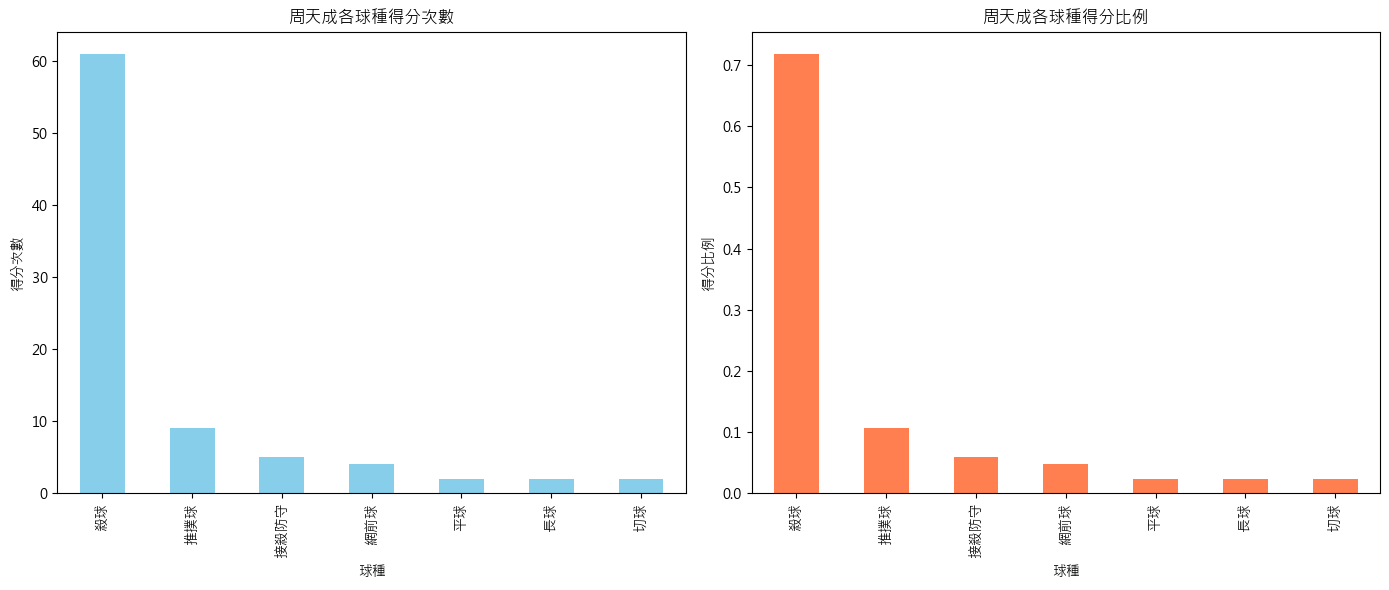

In [3]:
# 引入必要的庫
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集不為空
if len(df) > 0:
    # 過濾出直接得分的數據，即 `player` 為 'CHOU Tien Chen' 且 `getpoint_player` 為 'CHOU Tien Chen'
    chou_scores = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 根據 `player_type` 分組計數得分次數
    chou_score_counts = chou_scores['type'].value_counts()
    
    # 計算各球種得分比例
    chou_score_ratios = chou_score_counts / chou_score_counts.sum()

    # 打印出結果
    print("周天成使用各球種得分的次數：")
    print(chou_score_counts)
    print("\n周天成使用各球種得分的比例：")
    print(chou_score_ratios)

    # Visualize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # 頻次圖 (Counts)
    chou_score_counts.plot(kind='bar', ax=ax[0], color='skyblue', title='周天成各球種得分次數')
    ax[0].set_xlabel('球種')
    ax[0].set_ylabel('得分次數')

    # 比例圖 (Ratios)
    chou_score_ratios.plot(kind='bar', ax=ax[1], color='coral', title='周天成各球種得分比例')
    ax[1].set_xlabel('球種')
    ax[1].set_ylabel('得分比例')

    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用數據。")

第三題(OK)
針對周天成所有「殺球」，繪製其落點熱區圖。

周天成的殺球數量: 299


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\2748036356.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


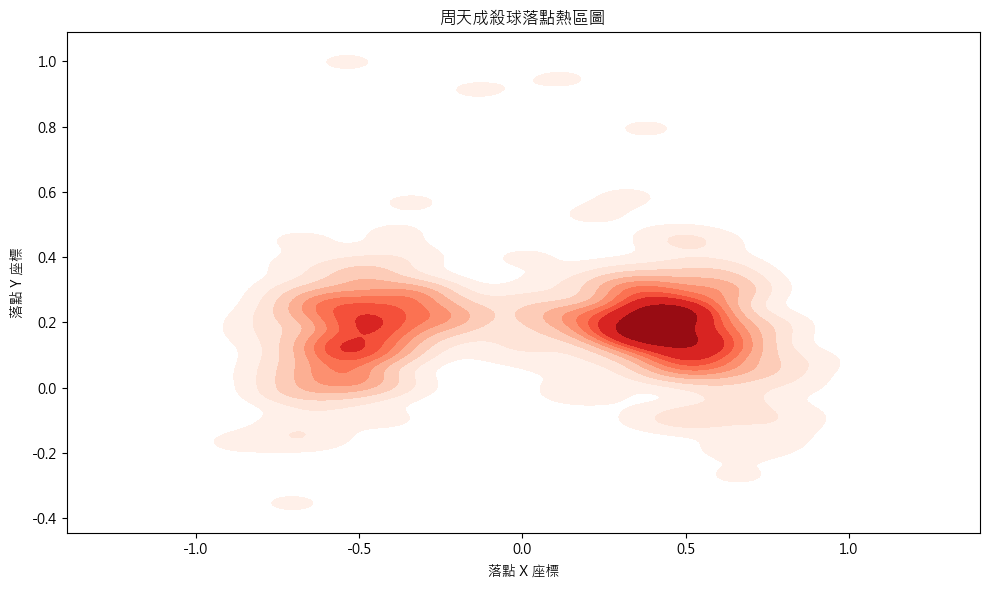

In [4]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定圖表字體以支援繁體中文
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據不為空
if len(df) > 0:
    # 篩選出周天成的所有殺球數據
    chou_smashes = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 確保落點數據完整
    chou_smashes = chou_smashes.dropna(subset=['landing_x', 'landing_y'])

    # 檢查篩選後數據的長度
    print(f"周天成的殺球數量: {len(chou_smashes)}")
    
    # 繪製落點的熱區圖
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=chou_smashes['landing_x'], y=chou_smashes['landing_y'],
        cmap="Reds", shade=True, bw_adjust=0.5
    )
    plt.title('周天成殺球落點熱區圖')
    plt.xlabel('落點 X 座標')
    plt.ylabel('落點 Y 座標')
    plt.axis('equal')  # 保持軸的單位比例
    plt.tight_layout()  # 確保不重疊
    fig = plt.gcf()  # 獲取當前的 figure 對象
else:
    print("數據集為空，無法進行分析。")

# 到這裡，我們完成了對周天成殺球落點的熱區圖的生成。

第四題(OK)
分析周天成在雙方都達18分以上時的球種分布。

周天成在比分達到18以上時所使用的球種分布:
type
網前球     22
接殺防守    11
殺球       7
發短球      6
推撲球      6
長球       5
平球       4
挑球       3
切球       3
Name: count, dtype: int64


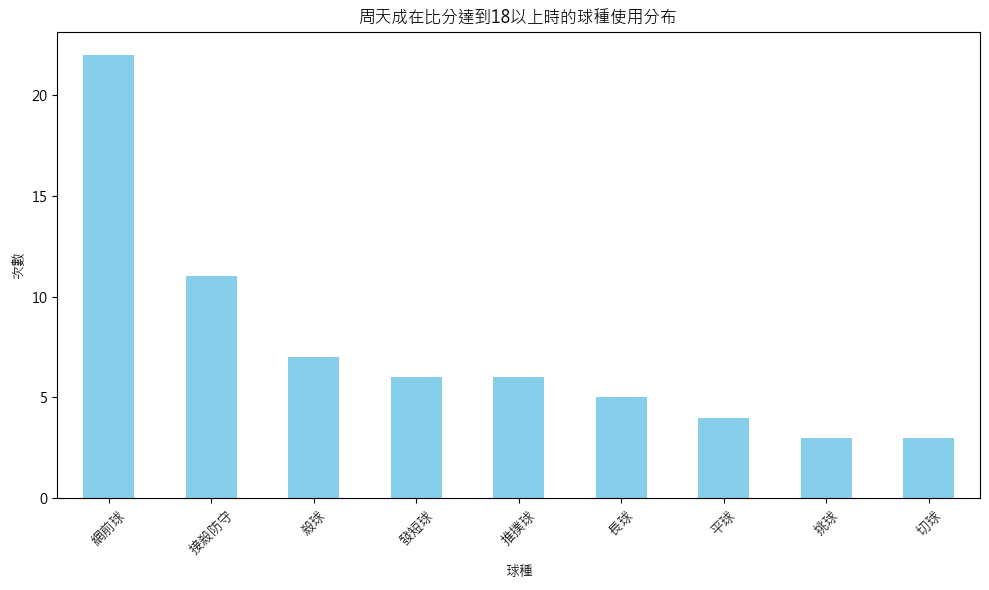

In [5]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據非空
if len(df) > 0:
    # 取得比分都達到18分以上的回合
    filtered_df = df[(df['player_score'] >= 18) & (df['opponent_score'] >= 18)]

    # 過濾周天成的球
    chou_df = filtered_df[filtered_df['player'] == 'CHOU Tien Chen']

    # 計算不同球種的出現次數
    shot_distribution = chou_df['type'].value_counts()

    # 打印分佈
    print("周天成在比分達到18以上時所使用的球種分布:")
    print(shot_distribution)

    # 視覺化球種分布
    fig, ax = plt.subplots(figsize=(10, 6))
    shot_distribution.plot(kind='bar', color='skyblue', ax=ax)
    
    # 標籤和標題
    ax.set_title('周天成在比分達到18以上時的球種使用分布')
    ax.set_xlabel('球種')
    ax.set_ylabel('次數')

    # 設置x軸刻度旋轉
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # 調整圖表布局
    plt.tight_layout()

else:
    print("數據集中無可用的數據進行分析。")

第五題(OK)
幫我繪製周天成造成得分時球的落點熱區圖

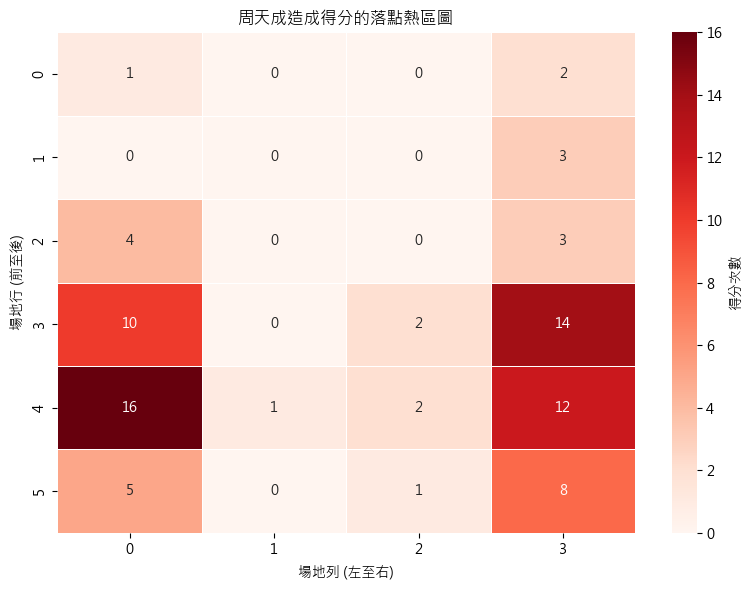

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 字體設置
import platform
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據存在
if len(df) > 0:
    # 篩選出周天成的得分
    chou_score_df = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 確保篩選後的數據量足夠
    if len(chou_score_df) > 0:
        # 根據場地區域來繪製熱區圖
        # 使用np.histogram2d來計算各區域的頻率
        heatmap_data = np.zeros((6, 4))
        zone_mapping = {
            1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3),
            5: (1, 0), 6: (1, 1), 7: (1, 2), 8: (1, 3),
            9: (2, 0), 10: (2, 1), 11: (2, 2), 12: (2, 3),
            13: (3, 0), 14: (3, 1), 15: (3, 2), 16: (3, 3),
            17: (4, 0), 18: (4, 1), 19: (4, 2), 20: (4, 3),
            21: (5, 0), 22: (5, 1), 23: (5, 2), 24: (5, 3)
        }
        
        for area in chou_score_df['landing_area']:
            if area in zone_mapping:
                row, col = zone_mapping[area]
                heatmap_data[row, col] += 1

        # 翻轉數據，方便畫面呈現
        heatmap_data = np.flipud(heatmap_data)

        # 繪製熱區圖
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, ax=ax, cbar_kws={'label': '得分次數'})
        ax.set_title('周天成造成得分的落點熱區圖')
        ax.set_xlabel('場地列 (左至右)')
        ax.set_ylabel('場地行 (前至後)')
        plt.tight_layout()
else:
    print("數據不足以進行分析。")

第六題(OK)
在第一場次中，每回合用的拍數，繪圖

     match_id  set  rally  ball_round
0         1.0    1      1           2
1         1.0    1      2           6
2         1.0    1      3          27
3         1.0    1      4           6
4         1.0    1      5          16
..        ...  ...    ...         ...
102       1.0    3     35          24
103       1.0    3     36           2
104       1.0    3     37           6
105       1.0    3     38          17
106       1.0    3     39          13

[107 rows x 4 columns]


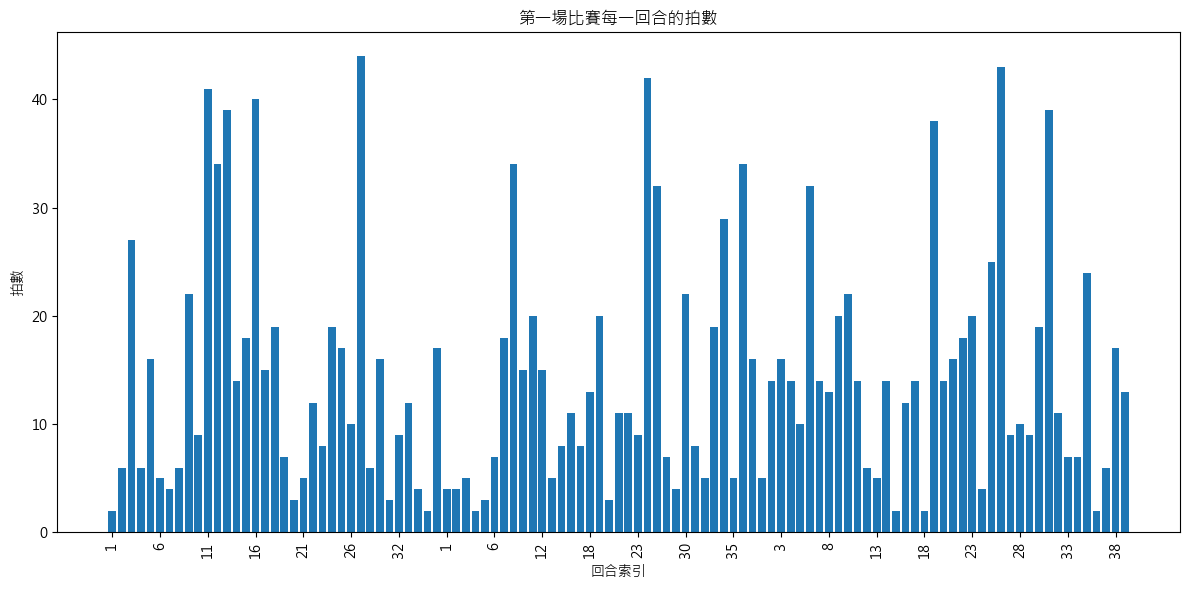

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認資料是否存在
if len(df) > 0:
    # 篩選第一場比賽
    match_1_df = df[df['match_id'] == 1.0]

    # 計算每一回合的拍數
    rally_shots = match_1_df.groupby(['match_id', 'set', 'rally'])['ball_round'].max().reset_index()

    # 打印每一回合的拍數
    print(rally_shots)

    # 視覺化
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(rally_shots.index, rally_shots['ball_round'])
    ax.set_title('第一場比賽每一回合的拍數')
    ax.set_xlabel('回合索引')
    ax.set_ylabel('拍數')
    
    # 設置 X 軸標籤間隔
    step = max(1, len(rally_shots) // 20)  # 每隔 20 個顯示一個標籤
    ax.set_xticks(rally_shots.index[::step])
    ax.set_xticklabels(rally_shots['rally'][::step], rotation=90)
    
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty, no data to process.")

第七題(OK)
繪製周天成殺球時的站點熱區圖

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 篩選數據: 周天成的殺球站位
chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

# 繪圖
if len(chou_smash_df) > 0:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=chou_smash_df['player_location_x'], y=chou_smash_df['player_location_y'], cmap="Reds", shade=True, bw_adjust=0.5)
    
    # 標題和標籤
    plt.title('周天成殺球站位熱區圖')
    plt.xlabel('X 座標')
    plt.ylabel('Y 座標')
    plt.xlim(-0.8, 0.8)  # 設定X軸範圍
    plt.ylim(-0.5, 1.0)  # 設定Y軸範圍

    plt.tight_layout()
    plt.show()
else:
    print("沒有符合條件的數據可用於分析。")

第八題(大致OK)
分析周天成使用殺球，對手都用什麼球種反擊，繪製圓餅圖

next_player_type
其他        6
接殺防守    169
網前球      38
Name: count, dtype: int64


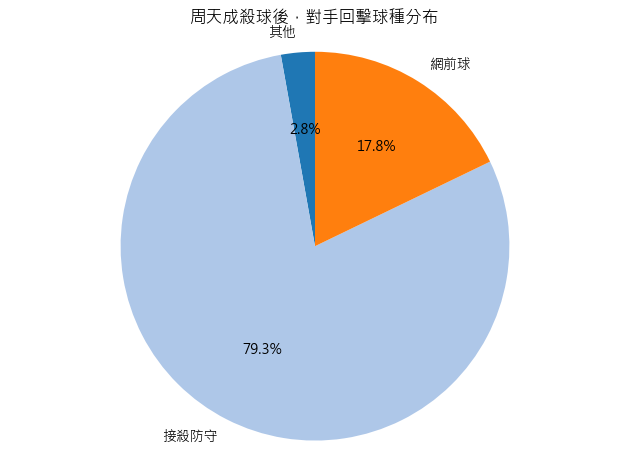

In [9]:
# Import the necessary libraries
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據量是否大於0
if len(df) > 0:
    # 在完整的數據框中，為每個組合（'match_id', 'set', 'rally'）添加下一個球的'player_type'
    df['next_player_type'] = df.groupby(['match_id', 'set', 'rally'])['player_type'].shift(-1)

    # 過濾周天成使用殺球的行
    chou_smashed = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 過濾掉 NaN，得到周天成殺球後的對手回擊球種
    chou_smashed_next = chou_smashed.dropna(subset=['next_player_type'])

    # 定義球種名稱對應的字典
    shot_type_map = {
        1.0: '發短球',
        2.0: '發長球',
        3.0: '長球',
        4.0: '殺球',
        5.0: '切球',
        6.0: '挑球',
        7.0: '平球',
        8.0: '網前球',
        9.0: '推撲球',
        10.0: '接殺防守',
        11.0: '接不到'
    }

    # 計算周天成殺球後對手回擊球種的分布
    counter_shot_distribution = chou_smashed_next['next_player_type'].map(shot_type_map).value_counts()

    # 合併小比例的類別為 "其他"
    threshold = 0.05 * counter_shot_distribution.sum()
    counter_shot_distribution = counter_shot_distribution.groupby(lambda x: x if counter_shot_distribution[x] >= threshold else '其他').sum()

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    ax.pie(counter_shot_distribution, labels=counter_shot_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # 圖表標題
    ax.set_title('周天成殺球後，對手回擊球種分布')

    # 使用tight layout
    plt.tight_layout()

    # 打印反擊球種分布數據
    print(counter_shot_distribution)

第九題(OK)
當周天成在「後場」擊球時，他最常使用哪三種球種?

In [8]:
import pandas as pd

# 確認 df 是否已載入並且有資料
if 'df' in globals() and len(df) > 0:
    # 篩選出周天成在後場擊球記錄
    back_court_df = df[
        (df['player'] == 'CHOU Tien Chen') &
        (df['hit_area'].isin([1, 2, 3, 4]))
    ]

    # 確認篩選後的資料是否非空
    if len(back_court_df) > 0:
        # 統計在後場擊球的球種使用頻率
        shot_type_counts = back_court_df['type'].value_counts()

        # 取得使用次數最多的三種球種
        top_3_shot_types = shot_type_counts.head(3)
        
        # 打印結果
        print("周天成在後場最常使用的三種球種是：")
        print(top_3_shot_types)
    else:
        print("無法找到周天成的後場擊球資料。")
else:
    print("資料框架 df 不存在或無資料。")

周天成在後場最常使用的三種球種是：
type
長球    227
殺球    176
切球    175
Name: count, dtype: int64


第十題(OK)
分析周天成站在前中後場，分別的得分與失分數

  場地區域  得分   失分
0   前場   9   13
1   中場  75  131
2   後場   1   16


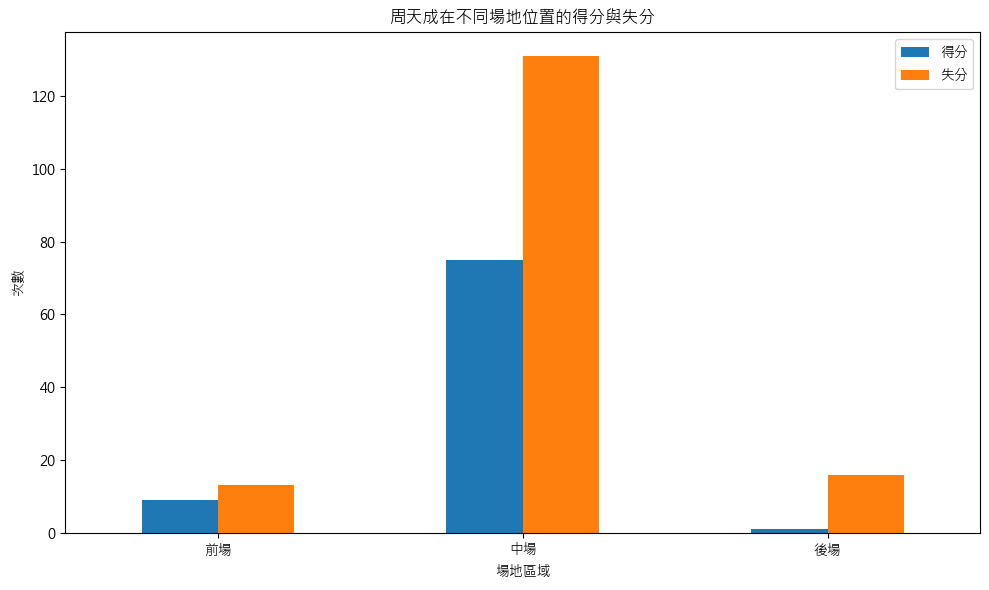

In [10]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被定義
if len(df) > 0:
    # 區域定義
    front_court_zones = [17, 18, 19, 20, 21, 22, 23, 24]
    mid_court_zones = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    back_court_zones = [1, 2, 3, 4]

    # 過濾出周天成相關的數據
    chou_tien_chen_df = df[df['player'] == 'CHOU Tien Chen']

    # 計算區域得分和失分
    area_performance = []
    for court_area, zones in zip(['前場', '中場', '後場'], 
                                 [front_court_zones, mid_court_zones, back_court_zones]):
        area_df = chou_tien_chen_df[chou_tien_chen_df['player_location_area'].isin(zones)]
        
        # 得分
        score_df = area_df[area_df['getpoint_player'] == 'CHOU Tien Chen']
        score_count = score_df.shape[0]

        # 失分
        lose_df = area_df[area_df['getpoint_player'] == 'Kento MOMOTA']
        lose_count = lose_df.shape[0]

        area_performance.append((court_area, score_count, lose_count))

    # 轉為 DataFrame
    performance_df = pd.DataFrame(area_performance, columns=['場地區域', '得分', '失分'])
    print(performance_df)

    # 畫圖
    fig, ax = plt.subplots(figsize=(10, 6))
    performance_df.plot(kind='bar', x='場地區域', stacked=False, ax=ax)
    ax.set_title('周天成在不同場地位置的得分與失分')
    ax.set_xlabel('場地區域')
    ax.set_ylabel('次數')
    ax.legend(['得分', '失分'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第11題(OK)
當周天成站在前場時，他最主要的得分方式?

周天成在前場的得分方式分佈：
type
殺球     7
推撲球    2
Name: count, dtype: int64


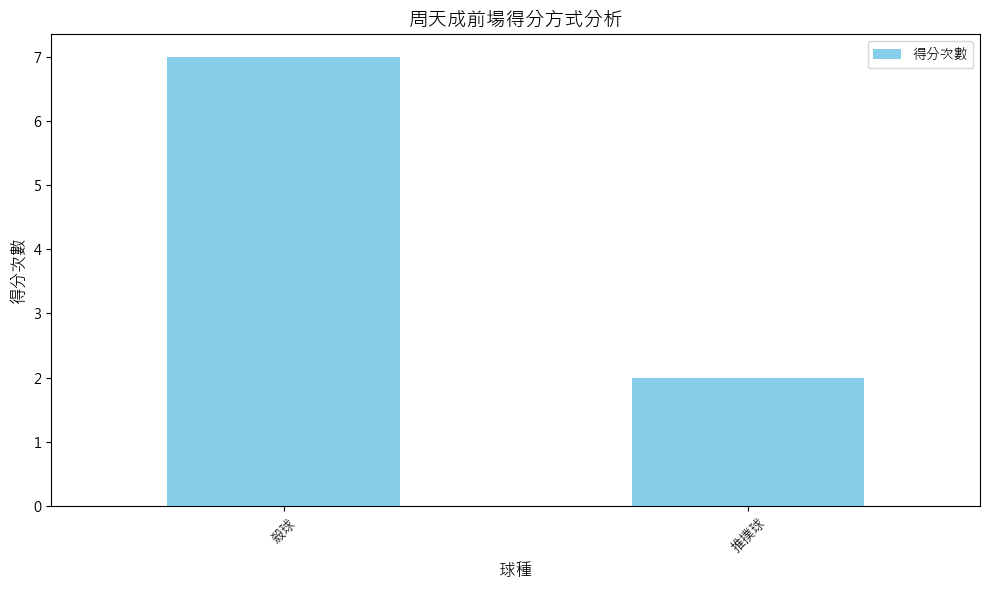

In [11]:
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據集非空
if len(df) > 0:
    # 定義前場位置區域
    front_court_zones = [17, 18, 19, 20, 21, 22, 23, 24]

    # 篩選周天成在前場擊球且得分的數據
    chou_front_win_df = df[(df['player'] == 'CHOU Tien Chen') &
                           (df['player_location_area'].isin(front_court_zones)) &
                           (df['getpoint_player'] == 'CHOU Tien Chen')]

    # 確認篩選條件有效性
    if len(chou_front_win_df) > 0:
        # 統計各球種的得分次數
        shot_type_points = chou_front_win_df['type'].value_counts()

        # 打印每種球技得分數據
        print("周天成在前場的得分方式分佈：")
        print(shot_type_points)

        # 視覺化得分數據
        fig, ax = plt.subplots(figsize=(10, 6))
        shot_type_points.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title("周天成前場得分方式分析", fontsize=14)
        ax.set_xlabel("球種", fontsize=12)
        ax.set_ylabel("得分次數", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend(["得分次數"])
    else:
        print("無數據顯示周天成在前場位置時的得分情況。")
else:
    print("數據集中沒有可用的記錄。")

第12題(OK)
計算周天成站在前場擊球時的落點分布。

周天成在前場擊球時的落點頻率如下：
landing_area
1.0      2
2.0      3
3.0      4
4.0      3
5.0      5
6.0      3
7.0      3
8.0      6
9.0      7
10.0     8
11.0     7
12.0    10
14.0     3
15.0     1
16.0     2
17.0     2
18.0     1
19.0     1
20.0     2
21.0     3
22.0     3
24.0     1
26.0     2
28.0     2
30.0     2
33.0     2
Name: count, dtype: int64


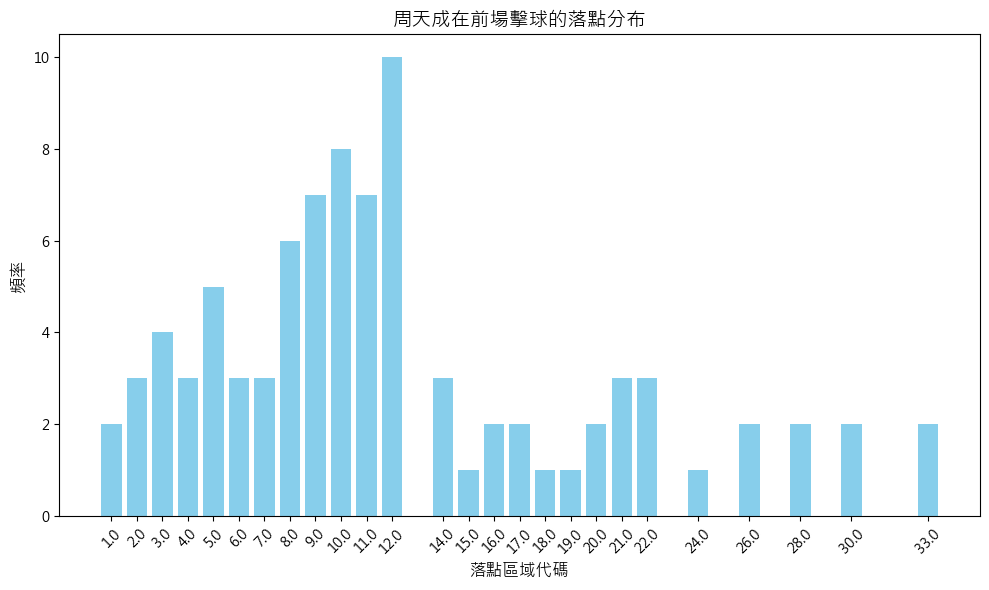

In [12]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 設置字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據是否存在
if len(df) > 0:
    # 過濾周天成站在前場擊球的數據
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    if len(filtered_df) > 0:
        # 計算各落點區域的出現頻率
        landing_area_counts = filtered_df['landing_area'].value_counts().sort_index()

        # 可視化落點分布
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(landing_area_counts.index, landing_area_counts.values, color='skyblue')
        ax.set_xlabel('落點區域代碼', fontsize=12)
        ax.set_ylabel('頻率', fontsize=12)
        ax.set_title('周天成在前場擊球的落點分布', fontsize=14)
        ax.set_xticks(landing_area_counts.index)  # 使用正確的區域代碼作為ticks
        ax.set_xticklabels(landing_area_counts.index)
        plt.xticks(rotation=45)
        plt.tight_layout()

        print(f"周天成在前場擊球時的落點頻率如下：\n{landing_area_counts}")
    else:
        print("無周天成在前場擊球的相關數據。")
else:
    print("數據框 df 為空。")

第13題(OK)
分析周天成站在前中後場擊球時，自己分別的移動距離

In [17]:
import numpy as np
import pandas as pd

# 驗證數據集是否不為空
if len(df) == 0:
    raise ValueError("數據集為空。")

# 過濾出周天成的數據
chou_data = df[df['player'] == 'CHOU Tien Chen'].copy()

# 針對 NaN 使用 dropna 處理所需欄位
chou_data = chou_data.dropna(subset=['player_location_area', 'player_move_x', 'player_move_y'])

# 計算移動距離
chou_data['move_distance'] = np.sqrt(chou_data['player_move_x']**2 + chou_data['player_move_y']**2)

# 分別計算前場、中場和後場的平均移動距離
front_court_area = [17, 18, 19, 20, 21, 22, 23, 24]
mid_court_area = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
back_court_area = [1, 2, 3, 4]

front_court_distance = chou_data[chou_data['player_location_area'].isin(front_court_area)]['move_distance'].mean()
mid_court_distance = chou_data[chou_data['player_location_area'].isin(mid_court_area)]['move_distance'].mean()
back_court_distance = chou_data[chou_data['player_location_area'].isin(back_court_area)]['move_distance'].mean()

print(f"前場平均移動距離: {front_court_distance:.2f}")
print(f"中場平均移動距離: {mid_court_distance:.2f}")
print(f"後場平均移動距離: {back_court_distance:.2f}")

前場平均移動距離: 0.23
中場平均移動距離: 0.32
後場平均移動距離: 0.34


第14題(OK)
幫我統整周天成所有球種的使用比例，以及每種球種的「得分次數」和「失誤次數」。

球種使用比例 (%):
type
切球       8.087390
平球       4.062859
挑球      10.348793
接殺防守    13.453430
推撲球     12.801840
殺球      11.460330
發短球      5.634343
發長球      1.303181
網前球     22.307397
長球      10.540437
Name: proportion, dtype: float64

每種球種的得分次數:
type
切球       2
平球       2
接殺防守     5
推撲球      9
殺球      61
網前球      4
長球       2
Name: type, dtype: int64

每種球種的失誤次數:
type
切球       7
平球       7
挑球      17
接殺防守    37
推撲球     19
殺球      20
網前球     40
長球      11
Name: type, dtype: int64


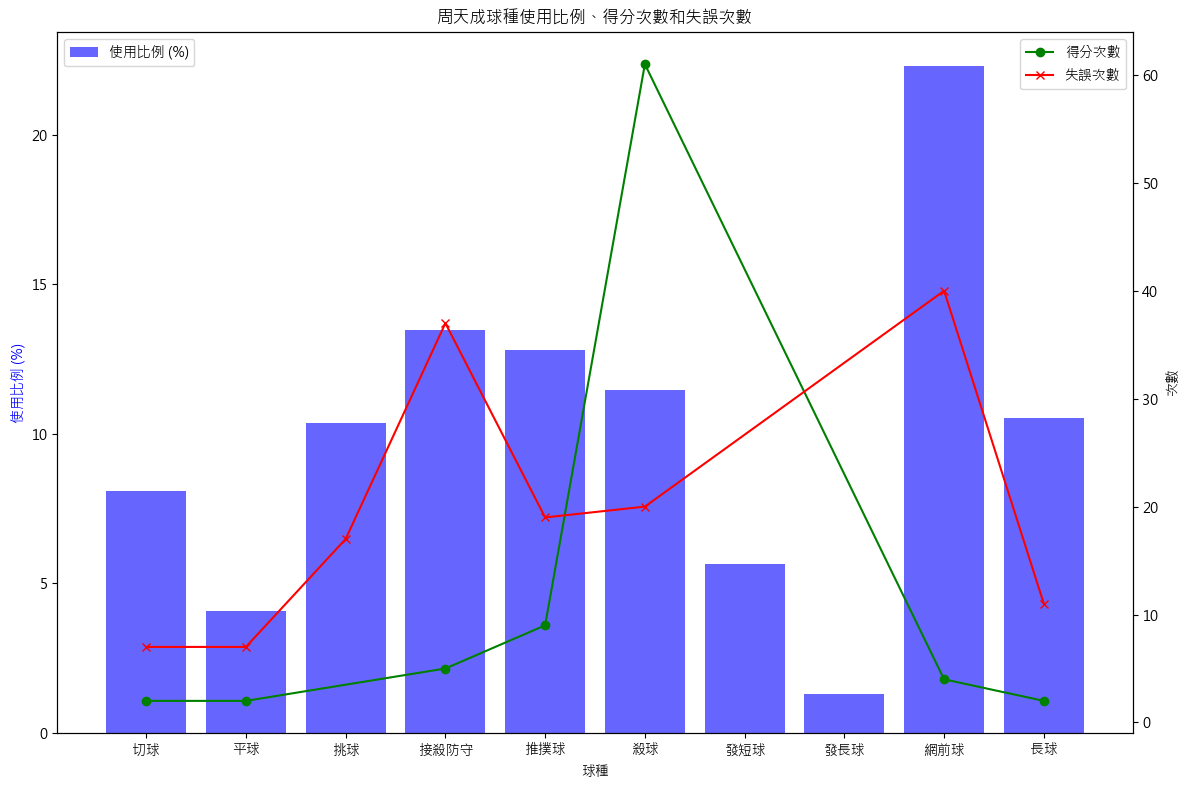

In [18]:
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt

# 字體設置
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據是否存在
if len(df) > 0:
    # 篩選出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 計算球種使用比例
    type_counts = chou_df['type'].value_counts(normalize=True) * 100
    type_counts = type_counts.sort_index()

    # 計算每種球種的得分次數
    win_counts = chou_df[(chou_df['getpoint_player'] == 'CHOU Tien Chen')].groupby('type')['type'].count()

    # 計算每種球種的失誤次數
    lose_counts = chou_df[(chou_df['getpoint_player'] != 'CHOU Tien Chen') & (~chou_df['lose_reason'].isna())].groupby('type')['type'].count()

    # 圖表合併三個信息
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # 繪製使用比例
    ax1.bar(type_counts.index, type_counts.values, color='b', alpha=0.6, label='使用比例 (%)')
    ax1.set_xlabel('球種')
    ax1.set_ylabel('使用比例 (%)', color='b')
    ax1.legend(loc='upper left')

    # 第二軸，共用 x 軸
    ax2 = ax1.twinx()
    ax2.plot(win_counts.index, win_counts.values, label='得分次數', color='g', marker='o')
    ax2.plot(lose_counts.index, lose_counts.values, label='失誤次數', color='r', marker='x')
    ax2.set_ylabel('次數', color='k')
    ax2.legend(loc='upper right')

    plt.title('周天成球種使用比例、得分次數和失誤次數')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Print important information
    print("球種使用比例 (%):")
    print(type_counts)
    print("\n每種球種的得分次數:")
    print(win_counts)
    print("\n每種球種的失誤次數:")
    print(lose_counts)

    # 返回繪製的圖表
    fig

第15題(OK)
幫我畫周天成失分原因的圓餅圖

周天成失分原因統計:
lose_reason
其他      2
出界     74
掛網     60
未過網    24
Name: count, dtype: int64


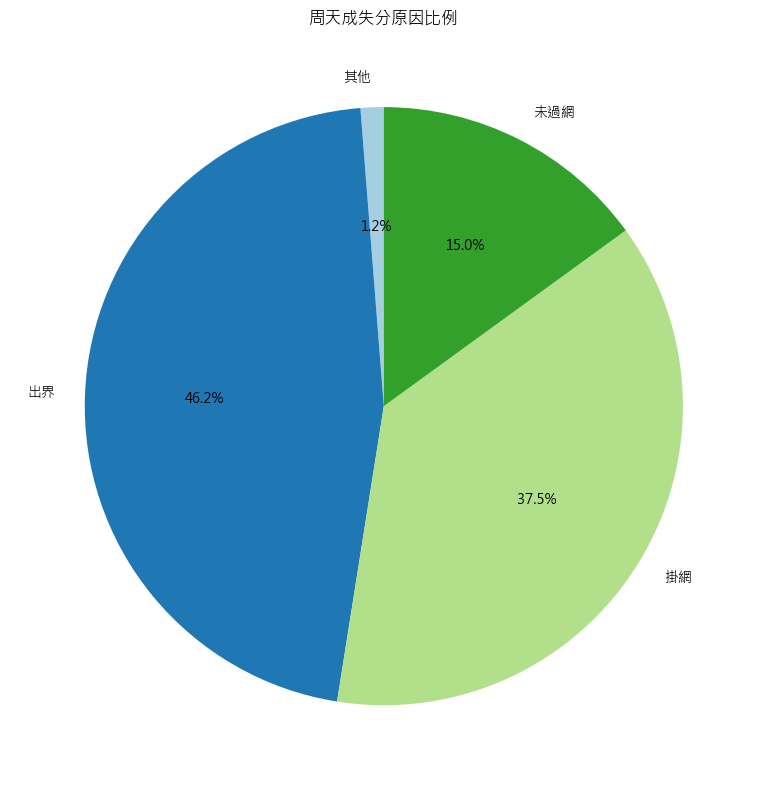

In [19]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 假設 df 已經定義並包含所需的數據

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# Step 1: 資料篩選
if len(df) > 0:
    # 過濾出周天成失分的情況
    chou_loss_df = df[(df['getpoint_player'] == 'Kento MOMOTA') & (df['lose_reason'].notna())]

    # Step 2: 統計失分原因
    lose_reason_counts = chou_loss_df['lose_reason'].value_counts()

    # 合併小於5%的類別為「其他」
    threshold = 0.05 * lose_reason_counts.sum()
    lose_reason_counts = lose_reason_counts.groupby(lambda x: x if lose_reason_counts[x] >= threshold else '其他').sum()

    # Step 3: 視覺化
    fig, ax = plt.subplots(figsize=(8, 8))

    # 圓餅圖
    ax.pie(
        lose_reason_counts,
        labels=lose_reason_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )

    ax.set_title('周天成失分原因比例')

    plt.tight_layout()

# 打印詳細失分原因計數
print("周天成失分原因統計:")
print(lose_reason_counts)

第16題(wrong)
在10拍以上的回合中，周天成的得分率是多少？

In [ ]:
#正確代碼
import pandas as pd

# 確認是否有數據可用
if len(df) > 0:
    # Step 2: 篩選出持續10拍以上的回合
    valid_rallies = df[df['ball_round'] > 10]

    # Step 3: 計算得分與總回合
    # 確保每個回合的唯一性
    rally_groups = valid_rallies.groupby(['match_id', 'set', 'rally'])

    # 分組後存取getpoint_player非空值的最後一筆資料確認得分者
    rally_winners = rally_groups['getpoint_player'].last().dropna()

    # 篩選出周天成得分的回合
    chou_tien_chen_wins = rally_winners[rally_winners == 'CHOU Tien Chen']

    # 計算得分與總回合
    chou_tien_chen_wins_count = len(chou_tien_chen_wins)
    total_valid_rallies_count = len(rally_winners)

    # Calculate the score rate
    chou_tien_chen_score_rate = chou_tien_chen_wins_count / total_valid_rallies_count if total_valid_rallies_count != 0 else 0

    # Print the results
    print(f"周天成在持續10拍以上的回合中的得分率: {chou_tien_chen_score_rate:.2%}")
else:
    print("數據不足以進行分析。")

周天成在持續10拍以上的回合中的得分率: 46.83%


第17題(OK)
給我所有局的最終得分數

In [21]:
import pandas as pd

# 確保數據的有效性
if len(df) > 0:
    # 過濾出每個 match_id 和 set 的最後一個 rally
    last_rallies = df.groupby(['match_id', 'set']).tail(1)

    # 計算最終比分
    last_rallies['final_player_score'] = last_rallies['player_score'] + (last_rallies['getpoint_player'] == 'Kento MOMOTA').astype(int)
    last_rallies['final_opponent_score'] = last_rallies['opponent_score'] + (last_rallies['getpoint_player'] == 'CHOU Tien Chen').astype(int)

    # 提取所需的列：match_id, set, final_player_score, final_opponent_score
    final_scores = last_rallies[['match_id', 'set', 'final_player_score', 'final_opponent_score']]
    
    # 打印出每局的最終得分
    print(final_scores)
else:
    print("DataFrame is empty.")

      match_id  set  final_player_score  final_opponent_score
517        1.0    1                22.0                  15.0
967        1.0    2                17.0                  22.0
1548       1.0    3                22.0                  18.0
1959       3.0    1                22.0                  19.0
2353       3.0    2                22.0                  17.0
2722       5.0    1                22.0                  13.0
3028       5.0    2                11.0                  22.0
3426       5.0    3                22.0                  16.0
3841       6.0    1                22.0                  21.0
4110       6.0    2                16.0                  22.0
4455       6.0    3                22.0                  15.0
4927       7.0    1                22.0                  19.0
5203       7.0    2                19.0                  12.0


C:\Users\Danie\AppData\Local\Temp\ipykernel_604\4003974762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rallies['final_player_score'] = last_rallies['player_score'] + (last_rallies['getpoint_player'] == 'Kento MOMOTA').astype(int)
C:\Users\Danie\AppData\Local\Temp\ipykernel_604\4003974762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rallies['final_opponent_score'] = last_rallies['opponent_score'] + (last_rallies['getpoint_player'] == 'CHOU Tien Chen').astype(int)


第18題(OK)
分析周天成前一拍打什麼球種最容易造成對手未過網？

周天成前一拍使用的球種，造成對手未過網的次數：
type
殺球      5
推撲球     3
網前球     2
平球      1
長球      1
接殺防守    1
Name: count, dtype: int64
Figure(1000x600)


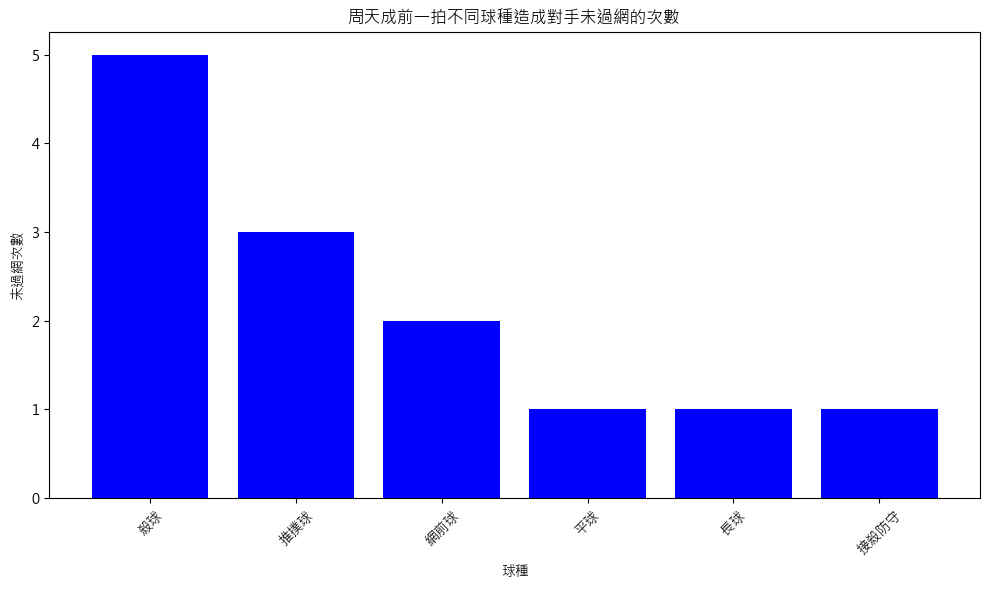

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保df非空
if len(df) > 0:
    # 1. 找出周天成作為擊球球員的數據
   #chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 2. 使用 shift 方法獲取下一拍的數據，並且下一拍的 'lose_reason' 是 '未過網'
    df['next_lose_reason'] = df['lose_reason'].shift(-1)
    df['next_player'] = df['player'].shift(-1)
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    # 3. 篩選對手的失誤原因是「未過網」
    unforced_errors_df = chou_df[(chou_df['next_lose_reason'] == '未過網') & (chou_df['next_player'] != 'CHOU Tien Chen')]

    # 4. 統計前一拍周天成使用的球種
    shot_count = unforced_errors_df['type'].value_counts()

    # 打印數據
    print("周天成前一拍使用的球種，造成對手未過網的次數：")
    print(shot_count)

    # 5. 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(shot_count.index, shot_count.values, color='b')
    ax.set_xlabel('球種')
    ax.set_ylabel('未過網次數')
    ax.set_title('周天成前一拍不同球種造成對手未過網的次數')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 打印fig物件
    print(fig)
else:
    print("數據集為空，無法進行分析。")

第19題(wrong:時序shift問題)
當對手被周天成從後場調動到「前場」時，對手最常使用什麼球種？

In [24]:
import pandas as pd

# Step 1: 檢查數據集的長度
if len(df) == 0:
    raise ValueError("數據集中沒有資料可供分析。")

# Step 2: 選擇與周天成相關數據
df_chou = df[df['player'] == 'CHOU Tien Chen']

# 為了便於分析，提取相關的索引信息
df_chou = df_chou.reset_index(drop=True)

# Step 3: 確認對手在後排（zone 1-4）擊球後且下一拍移動到前場（zone 17-24）的次數
df_chou['prev_opponent_location_area'] = df_chou.groupby(['match_id', 'set', 'rally'])['opponent_location_area'].shift(1)
df_chou['next_opponent_location_area'] = df_chou.groupby(['match_id', 'set', 'rally'])['opponent_location_area'].shift(-1)

# 選擇後排到前場的移動
def is_move_back_to_front(row):
    return (row['prev_opponent_location_area'] in [1, 2, 3, 4]) and (row['opponent_location_area'] in range(17, 25))

# 確認對手調動
df_chou_back_to_front = df_chou[df_chou.apply(is_move_back_to_front, axis=1)]

# Step 4: 對手在前場的第一拍使用的球種
first_shot_in_front = df_chou_back_to_front['opponent_type'].dropna()

# Step 5: 統計這些球種的使用頻率
shot_type_counts = first_shot_in_front.value_counts()

# 找出最常用的球種
most_common_type = shot_type_counts.idxmax()

# 打印結果: 最常用的球種代碼與對應中文名稱
shot_type_mapping = {
    1: '發短球', 2: '發長球', 3: '長球', 4: '殺球', 5: '切球',
    6: '挑球', 7: '平球', 8: '網前球', 9: '推撲球', 10: '接殺防守', 11: '接不到'
}

most_common_shot_name = shot_type_mapping.get(most_common_type, '未知球種')
print(f"當對手從後排調動到前場時，最常使用的球種是: {most_common_shot_name}（代碼: {most_common_type}）")

當對手從後排調動到前場時，最常使用的球種是: 網前球（代碼: 8.0）


第20題(OK)
幫我比較周天成（CHOU Tien Chen）他在短回合（<=4拍）、中回合（5-10拍）、長回合（>=11拍）中的勝率

總回合數:
rally_length_category
中回合    139
短回合     65
長回合    205
dtype: int64

周天成贏得的回合數:
rally_length_category
中回合    62
短回合    34
長回合    96
dtype: int64

周天成的勝率:
rally_length_category
中回合    0.446043
短回合    0.523077
長回合    0.468293
dtype: float64


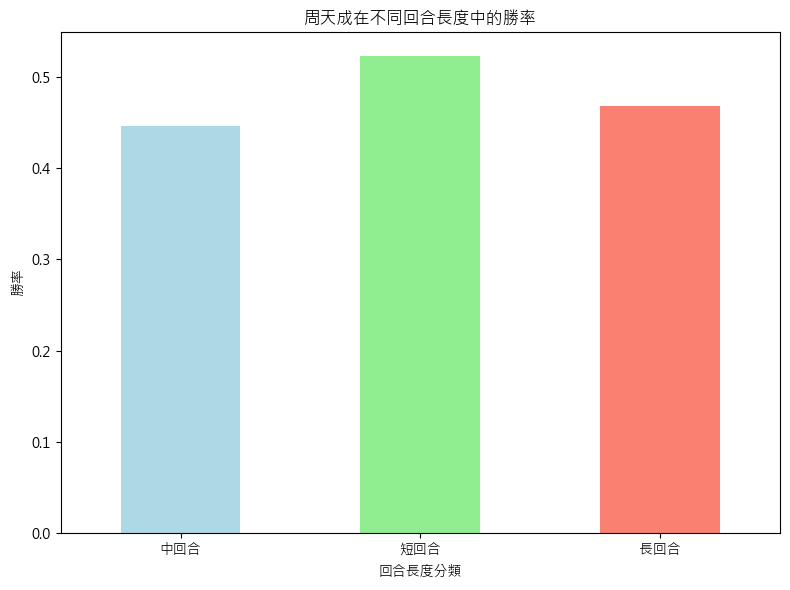

In [23]:
# 確保字體設定
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 驗證數據是否存在
if len(df) > 0:
    # 分類回合長度
    def categorize_rally_length(ball_round):
        if ball_round <= 4:
            return '短回合'
        elif 5 <= ball_round <= 10:
            return '中回合'
        else:
            return '長回合'
    
    # 增加一個新的分類欄位
    df['rally_length_category'] = df['ball_round'].apply(categorize_rally_length)
    
    # 確保以每個rally的最後一拍作為分組結果
    rally_end_df = df.groupby(['match_id', 'set', 'rally']).last().reset_index()
    
    # 篩選出周天成勝出的回合
    chou_win_df = rally_end_df[rally_end_df['getpoint_player'] == 'CHOU Tien Chen']

    # 計算每個回合長度類別的總回合數和周天成贏的回合數
    total_rallies = rally_end_df.groupby('rally_length_category').size()
    chou_wins = chou_win_df.groupby('rally_length_category').size()
    
    # 計算周天成在每個回合長度類別的勝率
    chou_win_rate = (chou_wins / total_rallies).fillna(0)  # 填充 NaN 為 0

    # 打印計算出來的勝率
    print("總回合數:")
    print(total_rallies)
    print("\n周天成贏得的回合數:")
    print(chou_wins)
    print("\n周天成的勝率:")
    print(chou_win_rate)
    
    # 可視化
    fig, ax = plt.subplots(figsize=(8, 6))
    chou_win_rate.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'], ax=ax)

    ax.set_title('周天成在不同回合長度中的勝率')
    ax.set_xlabel('回合長度分類')
    ax.set_ylabel('勝率')
    plt.xticks(rotation=0)
    plt.tight_layout()
    
else:
    print("數據集中沒有數據。")

第21題(OK)
當周天成的對手處於「前場」時，周天成打球的落點分布

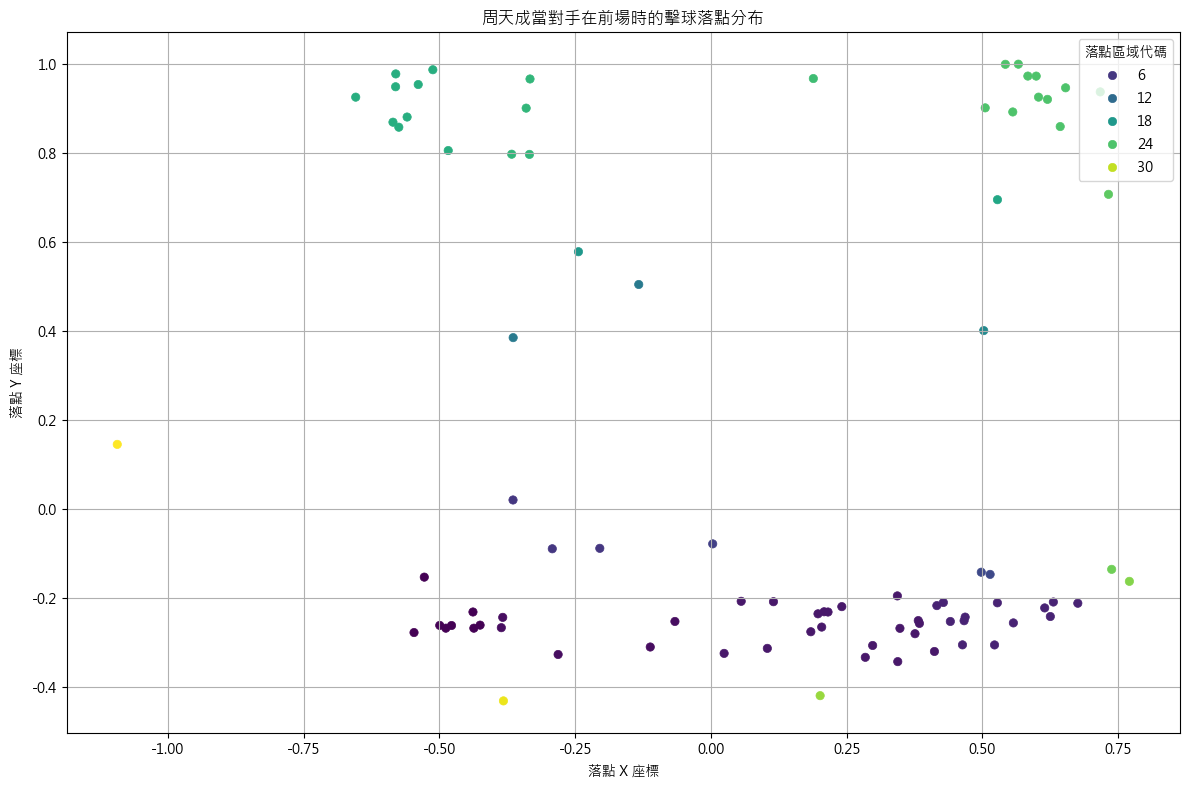

In [25]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保數據框有數據
if len(df) > 0:
    # 篩選條件：周天成為 player 且對手在前場區域
    filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['opponent_location_area'].isin([17, 18, 19, 20, 21, 22, 23, 24]))]

    # 確保篩選後數據框有數據
    if len(filtered_df) > 0:
        # 繪製散點圖顯示擊球落點
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=filtered_df, x='landing_x', y='landing_y', hue='landing_area', palette='viridis', edgecolor=None)
        plt.title('周天成當對手在前場時的擊球落點分布')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.grid(True)
        plt.tight_layout()
        plt.legend(title='落點區域代碼', loc='upper right')
        fig = plt.gcf()  # 獲得當前圖表對象以便外部操作
    else:
        print("沒有符合條件的數據可以進行分析。")
else:
    print("數據框為空，無法進行分析。")

第22題(OK)
分析周天成使用殺球造成失誤，請繪製失誤原因的圓餅圖

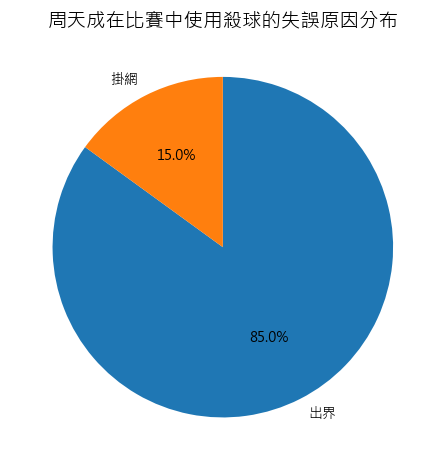

周天成使用殺球造成失誤的原因分布：
lose_reason
出界    17
掛網     3
Name: count, dtype: int64


In [26]:
import platform
import matplotlib.pyplot as plt
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確保 df 存在且大於零
if len(df) > 0:
    # 篩選出周天成的殺球失誤資料
    chou_smash_errors = df[(df['player'] == 'CHOU Tien Chen') & 
                           (df['type'] == '殺球') &
                           (df['lose_reason'].notna())]

    # 統計不同失誤原因的次數
    error_reasons_count = chou_smash_errors['lose_reason'].value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots()
    ax.pie(error_reasons_count, labels=error_reasons_count.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title('周天成在比賽中使用殺球的失誤原因分布', fontsize=14)
    
    plt.tight_layout()  # 確保不重疊
    plt.show()

    # 打印詳細結算信息
    print("周天成使用殺球造成失誤的原因分布：")
    print(error_reasons_count)
else:
    print("DataFrame is empty. Ensure data is loaded correctly.")

第23題(OK)
給我周天成最常見的失分原因

失分原因分佈：
lose_reason
出界     74
掛網     60
未過網    24
Name: count, dtype: int64


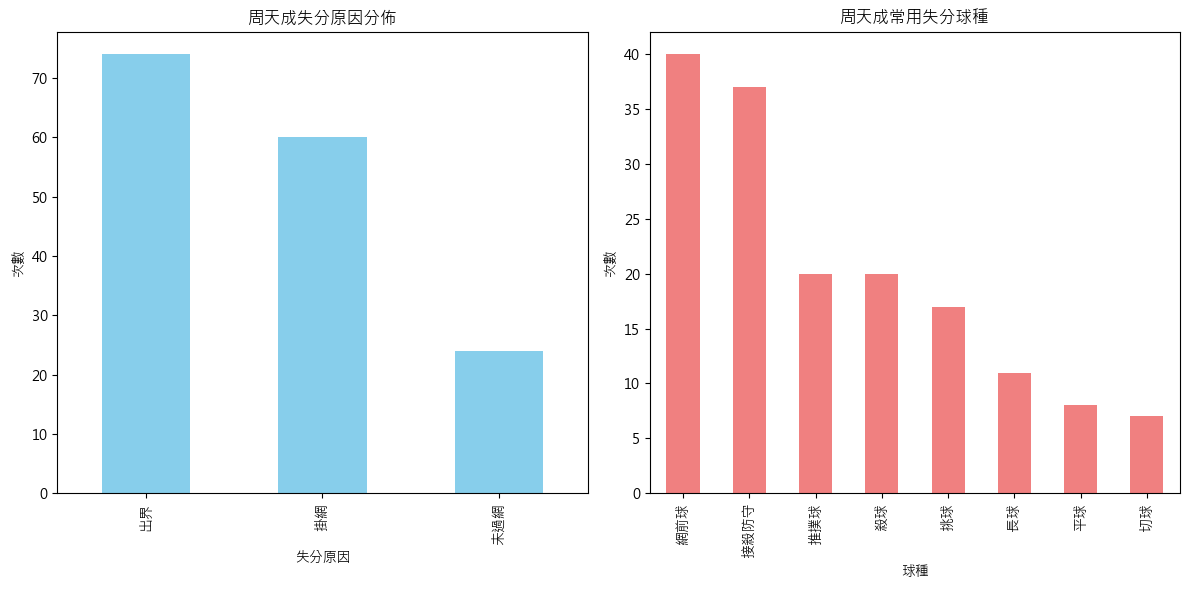

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 確認數據集不為空
if len(df) > 0:
    # 篩選周天成作為擊球者但由對手得分的情況
    chou_df = df[(df['player'] == 'CHOU Tien Chen') & (df['getpoint_player'] == 'Kento MOMOTA')]
    
    # 計算失分原因的分佈
    lose_reason_count = chou_df['lose_reason'].value_counts(dropna=True)
    
    # 打印失分原因
    print("失分原因分佈：")
    print(lose_reason_count)

    # 總結球種在失分中的情況
    type_count = chou_df['type'].value_counts(dropna=True)

    # 視覺化
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # 失分原因圖表
    lose_reason_count.plot(kind='bar', ax=ax[0], color='skyblue')
    ax[0].set_title('周天成失分原因分佈')
    ax[0].set_xlabel('失分原因')
    ax[0].set_ylabel('次數')
    
    # 球種分佈圖表
    type_count.plot(kind='bar', ax=ax[1], color='lightcoral')
    ax[1].set_title('周天成常用失分球種')
    ax[1].set_xlabel('球種')
    ax[1].set_ylabel('次數')
    
    plt.tight_layout()
    plt.show()
else:
    print("數據集為空，無法進行分析。")

第24題(wrong)
在周天成的所有失分中，有多少百分比是因為對手的殺球導致的？

In [28]:
# Step 1: 驗證數據量
if len(df) > 0:
    # Step 2: 篩選失分情況 (周天成的失分)
    chou_lose_df = df[df['getpoint_player'] == 'Kento MOMOTA']
    
    # 確保有數據可供分析
    if len(chou_lose_df) > 0:
        # Step 3: 檢查失分原因 (因為對手殺球)
        chou_lose_by_opponent_smash = chou_lose_df[chou_lose_df['type'] == '殺球']
        
        # 計算總失分的筆數
        total_lose_count = len(chou_lose_df)
        
        # 計算因殺球導致失分的筆數
        smash_lose_count = len(chou_lose_by_opponent_smash)
        
        # Step 4: 計算百分比
        smash_lose_percentage = (smash_lose_count / total_lose_count) * 100
        
        # 打印結果
        print(f"周天成所有失分中，有 {smash_lose_percentage:.2f}% 是因為對手的殺球導致的失分。")
    else:
        print("沒有找到周天成的失分記錄。")
else:
    print("數據框為空。")

周天成所有失分中，有 22.57% 是因為對手的殺球導致的失分。


第25題(OK)
繪製周天成所有輸球原因為'掛網'時的球員站位熱區圖？

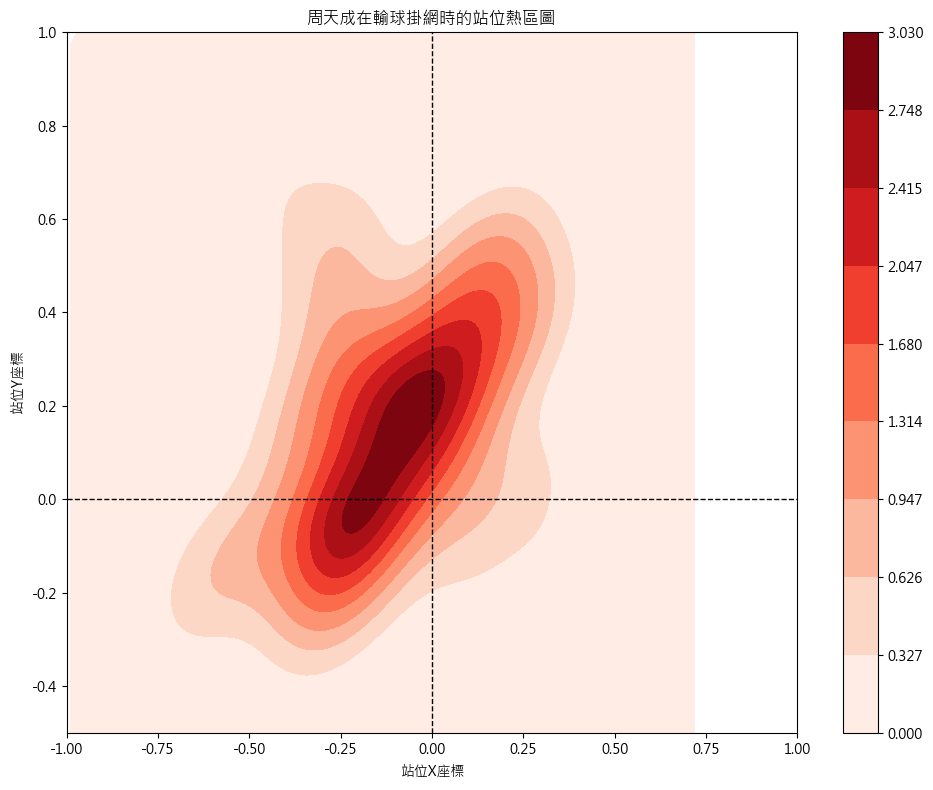

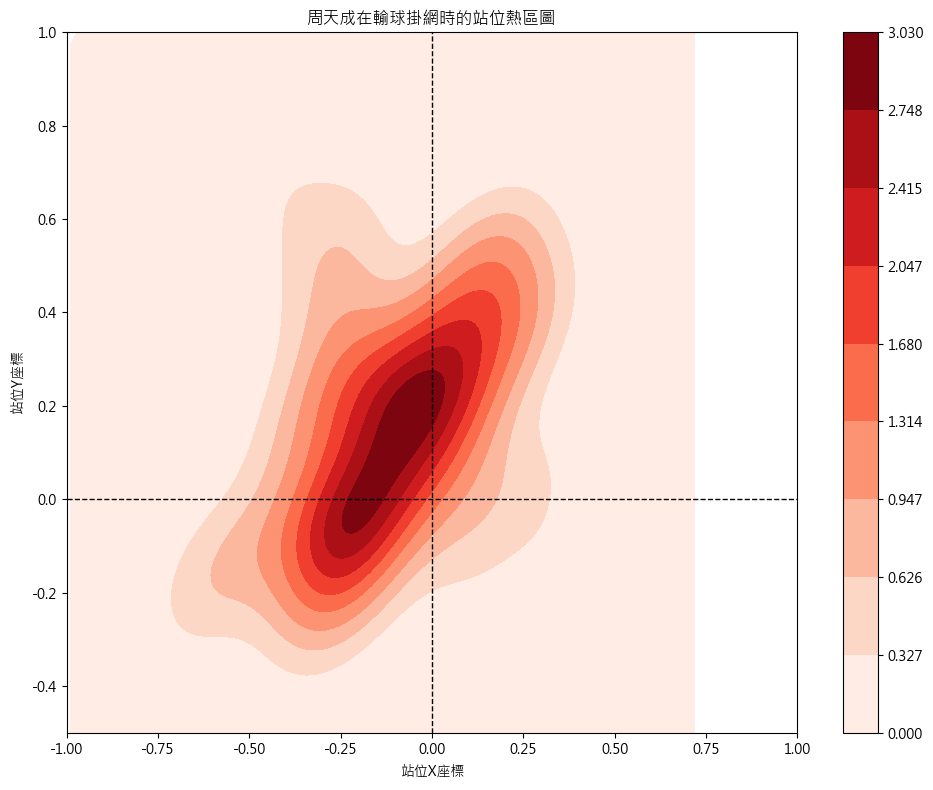

In [29]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 字體設置，確保需支援中文顯示
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 數據篩選：周天成且輸球原因為"掛網"
filtered_df = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '掛網')]

# 2. 確認數據存在
if len(filtered_df) > 0:
    # 3. 繪製熱圖
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=filtered_df, x='player_location_x', y='player_location_y', cmap="Reds", fill=True, thresh=0, cbar=True)
    
    # 圖表標籤
    plt.title('周天成在輸球掛網時的站位熱區圖')
    plt.xlabel('站位X座標')
    plt.ylabel('站位Y座標')
    plt.xlim(-1, 1)  # 設定合理的x範圍
    plt.ylim(-0.5, 1)  # 設定合理的y範圍
    plt.axhline(0, color='black', linewidth=1, linestyle='--')  # 添加網線
    plt.axvline(0, color='black', linewidth=1, linestyle='--')  # 添加中線
    
    plt.tight_layout()
    fig = plt.gcf()
else:
    print("沒有符合條件的數據，無法繪製熱圖。")

# 輸出圖形物件
fig

第26題(Wrong-自己應該是opponent_score)
分析周天成在開局（自己0-5 分）、中局（自己5-18 分）和關鍵分（自己18 分以上）三個比分階段中，他自己移動距離的差異。

In [ ]:
import platform
import matplotlib.pyplot as plt
import numpy as np

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 數據檢查
if len(df) == 0:
    raise ValueError("DataFrame is empty")

# 2. 計算移動距離 (僅限於角色是周天成)
df['移動距離'] = np.sqrt((df['player_move_x'])**2 + (df['player_move_y'])**2)

# 3. 定義比分階段
def score_stage(row):
    if 0 <= row['player_score'] <= 5:
        return '開局'
    elif 5 < row['player_score'] <= 18:
        return '中局'
    elif row['player_score'] > 18:
        return '關鍵分'
    else:
        return None

df['比分階段'] = df.apply(score_stage, axis=1)

# 4. 過濾出周天成的數據
chou_df = df[df['player'] == 'CHOU Tien Chen'].dropna(subset=['移動距離', '比分階段'])

# 5. 分析比不同分階段的移動距離
results = chou_df.groupby('比分階段')['移動距離'].agg(['mean', 'std', 'count'])
print("移動距離分數階段分析:\n", results)

# 6. 視覺化
fig, ax = plt.subplots(figsize=(10, 6))
chou_df.boxplot(column='移動距離', by='比分階段', ax=ax)
ax.set_title("周天成在不同比分階段的移動距離")
ax.set_xlabel("比分階段")
ax.set_ylabel("移動距離")
plt.suptitle("")  # Remove default suptitle to keep it clean
plt.tight_layout()

print(fig)

第27題(OK)
當對手使用「殺球」攻擊周天成時，周天成回球的失誤率是多少？

In [ ]:
import pandas as pd

# 計算失誤對比總回球次數的比例
def calculate_fault_rate(df):
    if len(df) == 0:
        return "No data available"

    # 準備對應的前拍資訊，用shift
    df['prev_player'] = df.groupby(['match_id', 'set', 'rally'])['player'].shift(1)
    df['prev_type'] = df.groupby(['match_id', 'set', 'rally'])['type'].shift(1)
    
    # 篩選出前拍為對手的殺球，即周天成回球的球
    chou_face_smash = df[(df['prev_type'] == '殺球') & (df['prev_player'] != 'CHOU Tien Chen')]
    
    # 總的回球次數
    total_returns = len(chou_face_smash)

    # 計算失誤次數
    error_returns = len(chou_face_smash[(chou_face_smash['player'] == 'CHOU Tien Chen') & 
                                        (~chou_face_smash['lose_reason'].isna())])

    # 計算失誤率
    if total_returns > 0:
        error_rate = error_returns / total_returns
    else:
        error_rate = float('nan')

    print(f"失誤次數: {error_returns}, 總回球次數: {total_returns}, 失誤率: {error_rate:.2%}")

# 執行計算
calculate_fault_rate(df)